## **Data descripcion <span style="color:orange ;">(Real_World Data):**


`MANGO1-4 TO 15-11.csv` is about an online perfume store sales ,the data contains general information for each order in the past six monthes (4-1-2024 ~ 11-15-2024) like the Delivering Area ,order price,order Date,etc.



---

## **Data Preprocessing**

**1. Preprocess the dataset (handle missing values, encode categorical 
variables).**


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Shahed\OneDrive - Hashemite University\ML_project\MANGO1-4 TO 15-11.csv")

In [2]:
df.head()

,Reference number,AWB,Company,Store,Recipient Name,Company Payment Type,Delivering City,Delivering Area,Shipment Details,Zones,Cash on Delivery,Returned With Fees,Exp Delivery Fees,Shipment Status,Creation Date,Distribution Center Date,AssignTo Courier Date,Acctual Delivering Date,COD Collection Date,Company Settlement Date
0,R26313t,24030458001389,mango perfume,mango perfume,NaN,Pay After Delivery,Amman,ابو علندا,NaN,C 2,0.0,NaN,1.50,Item Returned To Company Completed,4/1/2024 2:29:30 AM,4/1/2024 4:07:13 AM,NaN,NaN,NaN,NaN
1,R25881,24030458001390,mango perfume,mango perfume,NaN,Pay After Delivery,Amman,ابو علندا,NaN,C 2,0.0,NaN,1.50,Item Returned To Company Completed,4/1/2024 2:30:31 AM,4/1/2024 4:07:13 AM,NaN,NaN,NaN,NaN
2,R0799667914,24040458000001,mango perfume,mango perfume,NaN,Pay After Delivery,Amman,ابو علندا,NaN,C 2,0.0,NaN,1.50,Item Returned To Company Completed,4/1/2024 4:25:43 AM,4/1/2024 4:26:33 AM,NaN,NaN,NaN,NaN
3,3031F,24040458000002,mango perfume,mango perfume,.,Pay After Delivery,Irbid,بيت راس,بلاك افغانو١٠٠/توم فورد امير ليذر١٠٠/ديور هوم ...,Q 6,40.0,NaN,1.75,Item Returned To Company Completed,4/1/2024 4:53:53 AM,4/1/2024 7:28:21 AM,4/1/2024 9:54:34 AM,NaN,NaN,NaN
4,3032F,24040458000003,mango perfume,mango perfume,.,Pay After Delivery,Amman,اللبن,جنتل مان جفنشي ١٠٠,D 1,17.0,NaN,1.75,Cod Collected,4/1/2024 4:53:53 AM,4/1/2024 7:31:16 AM,4/2/2024 3:22:55 PM,4/2/2024 3:49:40 PM,4/3/2024 12:59:46 AM,4/3/2024 11:59:34 AM


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Reference number          3558 non-null   object 
 1   AWB                       3558 non-null   int64  
 2   Company                   3557 non-null   object 
 3   Store                     3557 non-null   object 
 4   Recipient Name            3111 non-null   object 
 5   Company Payment Type      3557 non-null   object 
 6   Delivering City           3557 non-null   object 
 7   Delivering Area           3557 non-null   object 
 8   Shipment Details          2838 non-null   object 
 9   Zones                     3257 non-null   object 
 10  Cash on Delivery          3557 non-null   float64
 11  Returned With Fees        10 non-null     float64
 12  Exp Delivery Fees         3547 non-null   float64
 13  Shipment Status           3557 non-null   object 
 14  Creation

---

**<span style="color:darkorange ;">Handling the null</span> values and dropping unnecessary columns**

In [4]:
df = df.drop(['Recipient Name','Returned With Fees','Store','Company Settlement Date','AssignTo Courier Date','COD Collection Date','Zones','Company','AWB','Distribution Center Date','Acctual Delivering Date','Delivering Area'], axis=1)

df = df.dropna(subset=['Shipment Details'])

df['Exp Delivery Fees'] = df['Exp Delivery Fees'].fillna(0)


In [5]:
df.isnull().sum()

Reference number        0
Company Payment Type    0
Delivering City         0
Shipment Details        0
Cash on Delivery        0
Exp Delivery Fees       0
Shipment Status         0
Creation Date           0
dtype: int64

---

**Unifying the Shipment Status values into (yes and no) yes if delivered and no if returned**

In [6]:
df['Shipment Status'].unique()

array(['Item Returned To Company Completed', 'Cod Collected',
       'Item Returned To Company Store By Driver'], dtype=object)

In [7]:
status_mapping = {
    'Cod Collected': 'yes',
    'Delivered To Customer': 'yes',
    'Item Returned To Company Store By Driver': 'No',
    'Item Returned To Company Completed': 'No',
    'Returned To Shipper': 'No',
    'Transmit from Warehouse': 'No',
    'Void From Customer': 'No'
}
df['Shipment Status'] = df['Shipment Status'].replace(status_mapping)

---

**Unifying the Delivering City values to english only**

In [8]:
df['Delivering City'].unique()

array(['Irbid', 'Amman', 'Madaba', 'Mafraq', 'Russeifa', 'Zarqa', 'Salt',
       'Ajlun', 'Tafilah', 'Rumtha', 'Aqaba', 'South Aghwar', 'Jarash',
       'North Aghwar', 'Maan', 'Karak', 'Wadi Musa', 'Petra ', 'الازرق',
       'Shobak', 'عمان', 'اربد', 'المفرق', 'مادبا', 'الرصيفة', 'الكرك',
       'الطفيلة', 'الزرقاء', 'عجلون', 'العقبة', 'وادي موسى', 'السلط',
       'معان', 'الرمثا', 'جرش', 'الاغوار الشمالية', 'الشوبك',
       'الاغوار الجنوبية', 'البتراء'], dtype=object)

In [9]:
translation_dict = {
    "عمان": "Amman",
    "اربد": "Irbid",
    "الزرقاء": "Zarqa",
    "مادبا": "Madaba",
    "المفرق": "Mafraq",
    "الرصيفة": "Russeifa",
    "السلط": "Salt",
    "عجلون": "Ajlun",
    "الطفيلة": "Tafilah",
    "الرمثا": "Rumtha",
    "العقبة": "Aqaba",
    "الاغوار الشمالية": "North Aghwar",
    "معان": "Maan",
    "الكرك": "Karak",
    "وادي موسى": "Wadi Musa",
    "البتراء": "Petra ",
    "الشوبك": "Shobak",
    "الاغوار الجنوبية": "South Aghwar",
    "جرش": "Jarash",
    "وادي رم": "Wadi Rum",
    "الازرق": "Al-Azraq"
}

df['Delivering City'] = df['Delivering City'].replace(translation_dict)


---

**Creating new feature named "Perfume_Count" from "Shipment Details" column that contains the number of perfumes in each order**

In [10]:
def count_perfumes(details):
    if "/" in details:
        return len(details.split("/"))
    elif "عدد" in details:
        match = re.search(r"عدد\s*(\d+)", details)
        if match:
            return int(match.group(1))
    return 1

df["Perfume_Count"] = df["Shipment Details"].apply(count_perfumes)

**Due to inconsistencies in the formats within the Shipment Details column, we manually reviewed and validated the data using spreadsheets.**
   - step 1: Convert the CSV File to Excel Format.

In [11]:
df_copy=df
df.to_excel('data.xlsx', index=False) 

print("The file was saved successfully: data.xlsx")

The file was saved successfully: data.xlsx


  - step 2: Download the Excel File.

In [12]:
df_copy.to_excel(r"C:\Users\user\OneDrive - Hashemite University\Desktop\machine\data.xlsx", index=False)
print("The file was successfully saved to the specified path!")

OSError: Cannot save file into a non-existent directory: 'C:\Users\user\OneDrive - Hashemite University\Desktop\machine'

---

In [20]:
import pandas as pd
d_new=pd.read_csv(r"C:\Users\Shahed\Downloads\ddata_new - Sheet1.csv")

In [21]:
d_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8310 entries, 0 to 8309
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reference number      8310 non-null   object
 1   Company Payment Type  8310 non-null   object
 2   Delivering City       8310 non-null   object
 3   Shipment Details      8310 non-null   object
 4   Cash on Delivery      8310 non-null   object
 5   Exp Delivery Fees     8310 non-null   object
 6   Shipment Status       8310 non-null   object
 7   Creation Date         8310 non-null   object
 8   Perfume_Count         8310 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 584.4+ KB


---

**Converting the data type to float and resolving issues with comma formatting.**

In [22]:
d_new['Cash on Delivery'] = d_new['Cash on Delivery'].astype(str).str.replace('٫', '.').str.replace(',', '').astype(float)
d_new['Exp Delivery Fees'] = d_new['Exp Delivery Fees'].astype(str).str.replace(',', '.').str.replace('٫', '.').astype(float)

**After visualizing the data, we discovered negative values in the Cash on Delivery column, indicating that the money was returned to the customer. Consequently, we need to update the corresponding values in the Shipment Status column to 'No'.**

In [24]:
def count_negatives(d_new, column_name):
    return (d_new[column_name] < 0).sum()


negative_count = count_negatives(d_new, 'Cash on Delivery')
d_new.loc[d_new['Cash on Delivery'] < 0, 'Shipment Status'] = 'No'
print(d_new[d_new['Cash on Delivery'] < 0][['Cash on Delivery', 'Shipment Status']])

      Cash on Delivery Shipment Status
1209            -21.00              No
1671            -25.00              No
1676            -30.00              No
3323            -25.00              No
3668            -34.00              No
3983            -34.00              No
4084             -6.25              No
4150             -0.25              No
4255            -32.00              No
4411            -32.00              No
4517            -32.00              No
4588            -32.00              No
4663            -20.00              No
4729            -32.00              No
5296            -32.00              No
5519            -19.00              No
6350            -17.00              No
6530            -32.00              No
6890            -32.00              No
7252            -10.00              No
7263            -17.00              No
7366            -30.00              No
7467            -32.00              No
7518            -34.00              No
7783             -0.25   

---

**Transforming the "Creation Date" into a datetime object and deriving new columns for the hour and the month.**

In [25]:
d_new['Creation Date'] = pd.to_datetime(d_new['Creation Date'], errors='coerce')

d_new['Hour'] = d_new['Creation Date'].dt.hour
d_new['Month'] = d_new['Creation Date'].dt.month

---

**Deleting the Company Payment Type column as it contained only a single unique value.**

In [26]:
print(d_new['Company Payment Type'].value_counts())
convert_dict = {"الدفع بعد الوصول": "Pay After Delivery",}
d_new['Company Payment Type'] = d_new['Company Payment Type'].replace(convert_dict)
d_new = d_new.drop(['Company Payment Type','Reference number','Shipment Details'], axis=1)

Company Payment Type
Pay After Delivery    4870
الدفع بعد الوصول      3440
Name: count, dtype: int64


---

In [27]:
d_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8310 entries, 0 to 8309
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Delivering City    8310 non-null   object        
 1   Cash on Delivery   8310 non-null   float64       
 2   Exp Delivery Fees  8310 non-null   float64       
 3   Shipment Status    8310 non-null   object        
 4   Creation Date      8310 non-null   datetime64[ns]
 5   Perfume_Count      8310 non-null   int64         
 6   Hour               8310 non-null   int32         
 7   Month              8310 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 454.6+ KB


## **Visualization**

**<span style="color:Darkorange ;">Resampling</span> the Data based on the target feature**

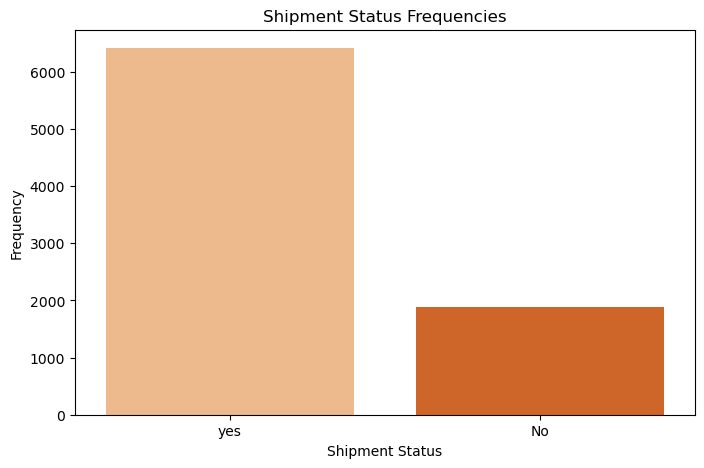

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

status_counts = d_new['Shipment Status'].value_counts().reset_index()
status_counts.columns = ['Shipment Status', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Shipment Status', y='Count', data=status_counts, palette='Oranges')
plt.title('Shipment Status Frequencies')
plt.xlabel('Shipment Status')
plt.ylabel('Frequency')
plt.show()

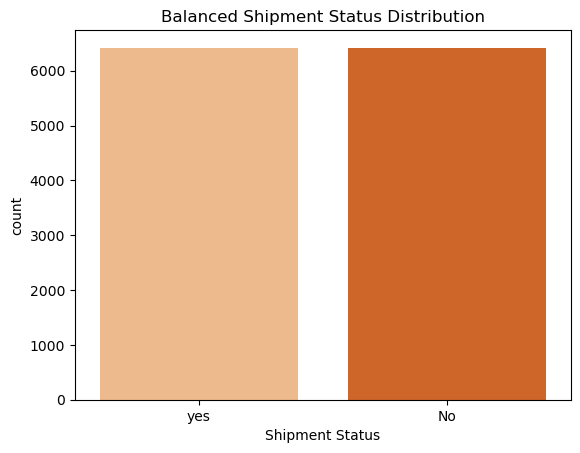

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

class_majority = d_new[d_new['Shipment Status'] == 'yes']
class_minority = d_new[d_new['Shipment Status'] == 'No']

class_minority_oversampled = class_minority.sample(len(class_majority), replace=True, random_state=42)

d_balanced = pd.concat([class_majority, class_minority_oversampled])

sns.countplot(x=d_balanced['Shipment Status'], palette='Oranges')
plt.title('Balanced Shipment Status Distribution')
plt.show()

---

**Visualizing the highest sales across cities using a <span style="color:Darkorange ;">bar chart</span>**

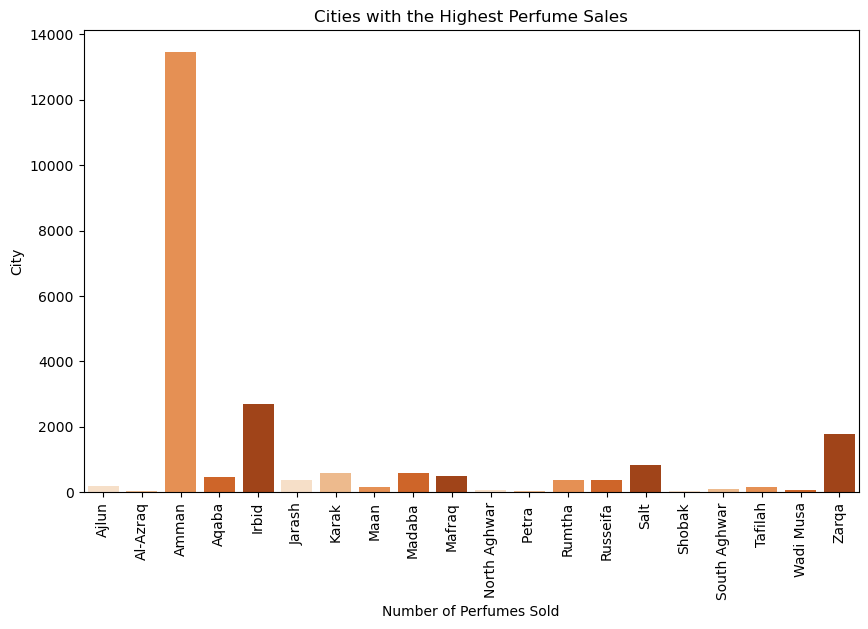

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

city_sales = d_new.groupby('Delivering City')['Perfume_Count'].sum().reset_index()  
city_sales = city_sales.sort_values(by='Perfume_Count', ascending=False)

plt.figure(figsize=(10, 6))
city_sales = d_new.groupby('Delivering City')['Perfume_Count'].sum().reset_index()
sns.barplot(x='Delivering City', y='Perfume_Count', data=city_sales, palette=sns.color_palette('Oranges', n_colors=5))
plt.title('Cities with the Highest Perfume Sales')
plt.xlabel('Number of Perfumes Sold')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()

---

**Visualizing the highest monthly sales using a <span style="color:Darkorange ;">bar chart</span>**

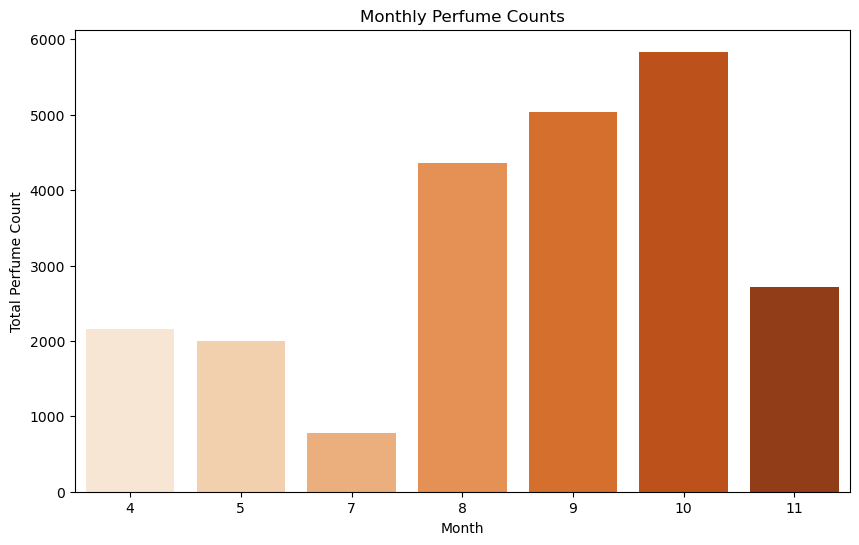

In [31]:
monthly_perfume_counts = d_new.groupby('Month')['Perfume_Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Perfume_Count', data=monthly_perfume_counts, palette='Oranges')
plt.title('Monthly Perfume Counts')
plt.xlabel('Month')
plt.ylabel('Total Perfume Count')
plt.show()

---

**Visualizing daily sales for <span style="color:Darkorange ;">October</span>, highlighting the highest sales within the month**

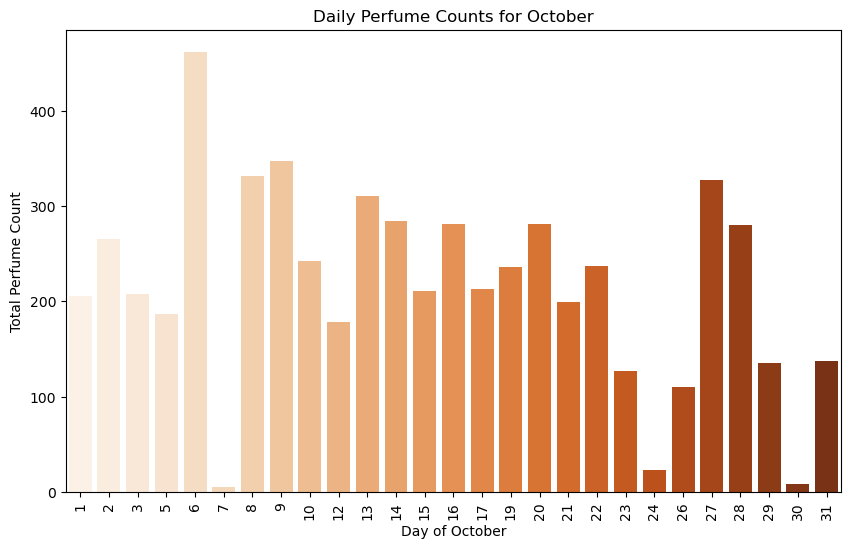

In [32]:
october_data = d_new[d_new['Month'] == 10].copy()

october_data['Day'] = october_data['Creation Date'].dt.day

daily_perfume_counts_october = october_data.groupby('Day')['Perfume_Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Perfume_Count', data=daily_perfume_counts_october, palette='Oranges')
plt.title('Daily Perfume Counts for October')
plt.xlabel('Day of October')
plt.ylabel('Total Perfume Count')
plt.xticks(rotation=90)  
plt.show()

---

**Visualizing the perfume count and its return status**

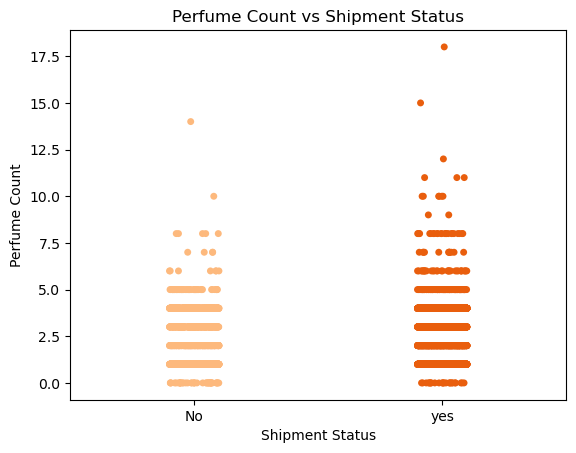

In [33]:
sns.stripplot(x='Shipment Status', y='Perfume_Count', data=d_new, jitter=True, palette='Oranges')

plt.title('Perfume Count vs Shipment Status')
plt.xlabel('Shipment Status')
plt.ylabel('Perfume Count')
plt.show()


---

**Using a <span style="color:Darkorange ;">violin plot</span> to display the distribution of Cash on Delivery across different Shipment Status categories**

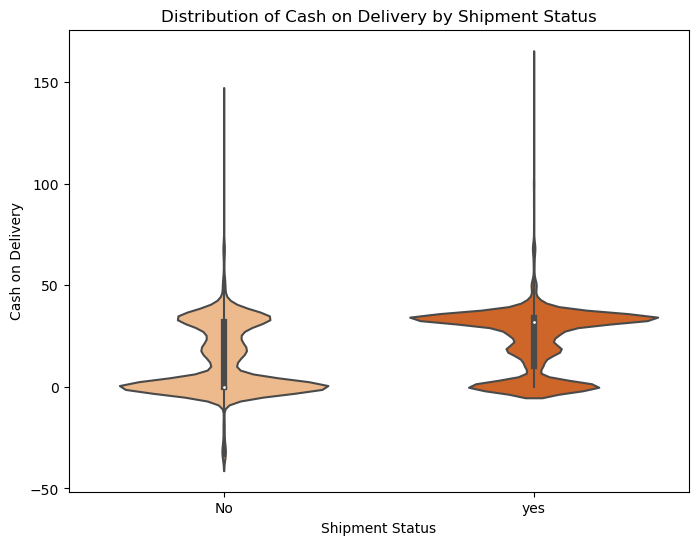

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Shipment Status', y='Cash on Delivery', data=d_new, palette='Oranges')
plt.title('Distribution of Cash on Delivery by Shipment Status')
plt.xlabel('Shipment Status')
plt.ylabel('Cash on Delivery')
plt.show()

---

**Showing the outliers using <span style="color:darkorange ;">boxplots</span>**

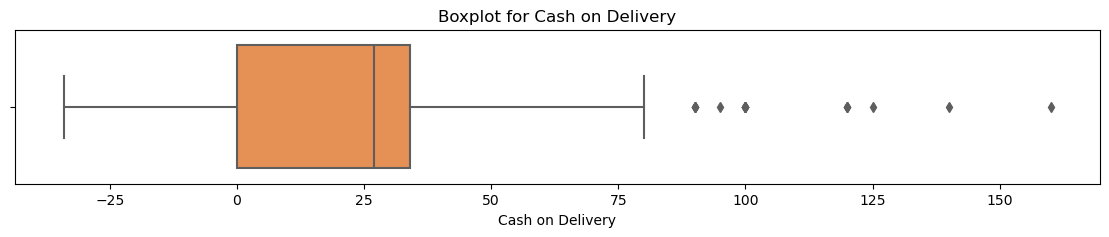

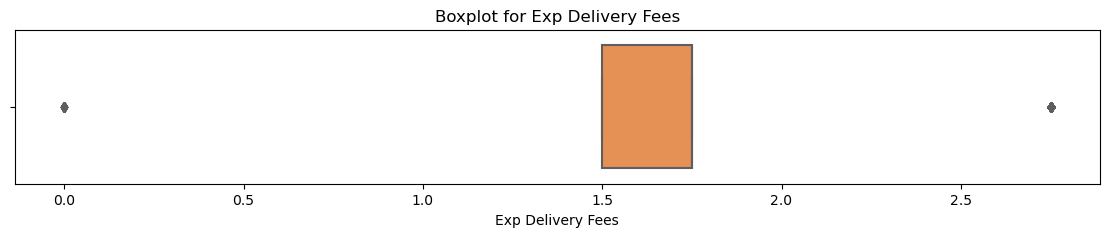

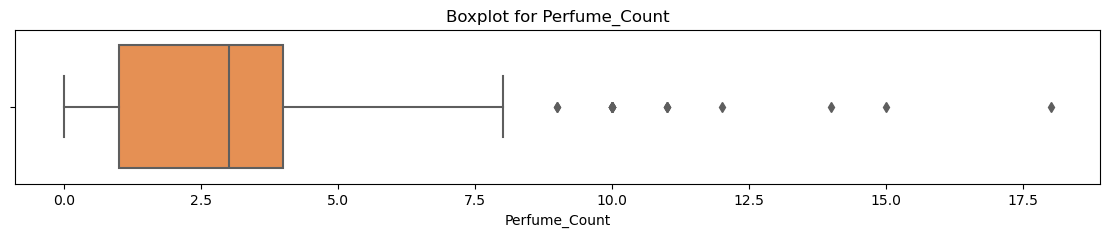

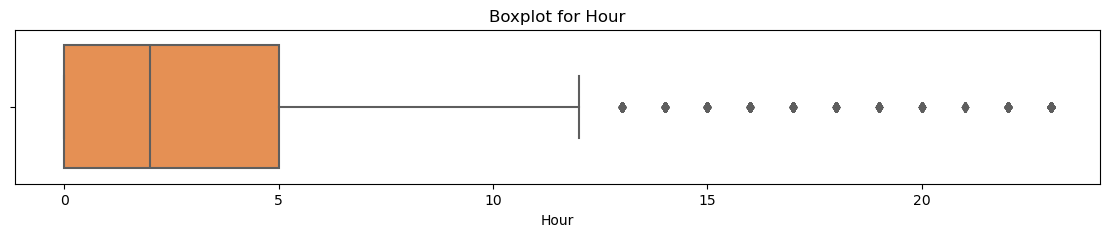

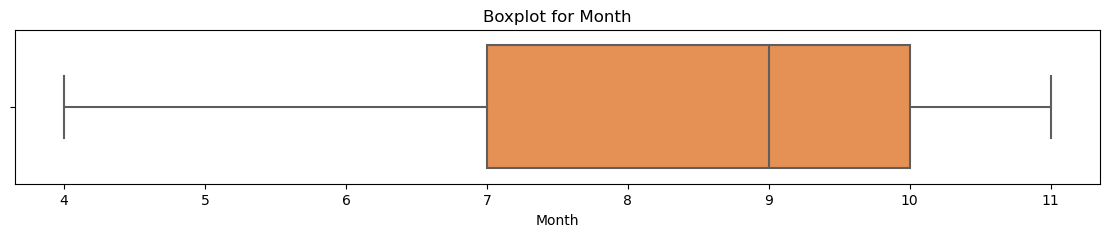

In [35]:
col_numeric = d_new.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()

for column in col_numeric:
    plt.figure(figsize=(14, 2))
    sns.boxplot(x=d_new[column],palette='Oranges')
    plt.title(f"Boxplot for {column}")
    plt.show()

---

**Showing the Perfume Count Distribution by Hour and Shipment Status**

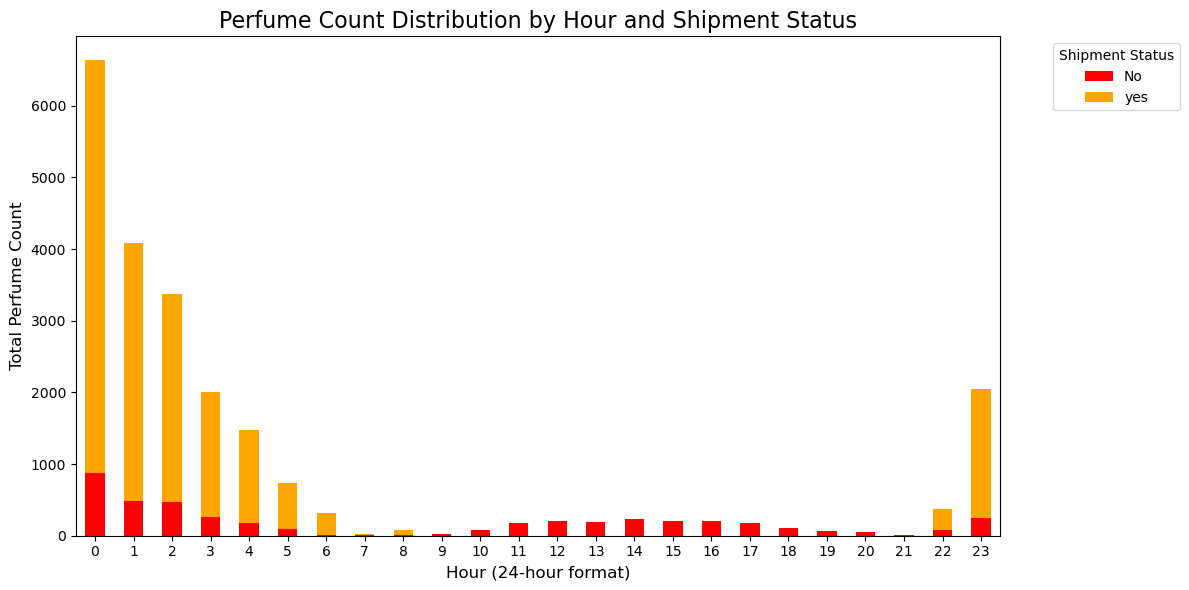

In [36]:
hourly_status_counts = d_new.groupby(['Hour', 'Shipment Status'])['Perfume_Count'].sum().reset_index()

pivot_data = hourly_status_counts.pivot(index='Hour', columns='Shipment Status', values='Perfume_Count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'orange'])

plt.title('Perfume Count Distribution by Hour and Shipment Status', fontsize=16)
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Total Perfume Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Shipment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

---

**Mapping the target column and generating a <span style="color:darkorange ;">heatmap</span> to visualize the correlation between all features**

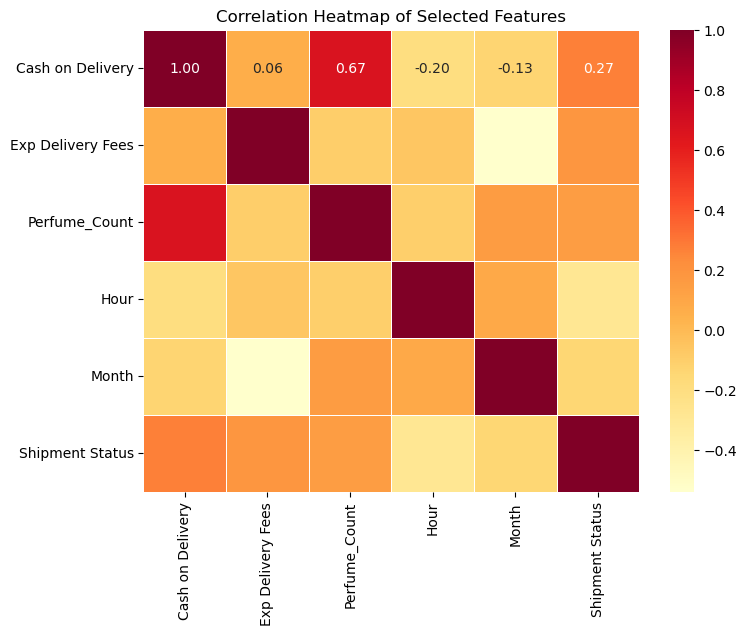

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
d_new['Shipment Status'] = d_new['Shipment Status'].map({'yes': 1, 'No': 0})
 
data_subset = d_new[['Cash on Delivery', 'Exp Delivery Fees', 'Perfume_Count', 'Hour', 'Month', 'Shipment Status']]

correlation_matrix = data_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap of Selected Features")
plt.show()


---

**Encoding categorical features.**

In [38]:
d_balanced = d_balanced.drop(['Creation Date'], axis=1)
d_balanced = pd.get_dummies(d_balanced, columns=['Delivering City'])
d_balanced

,Cash on Delivery,Exp Delivery Fees,Shipment Status,Perfume_Count,Hour,Month,Delivering City_Ajlun,Delivering City_Al-Azraq,Delivering City_Amman,Delivering City_Aqaba,...,Delivering City_North Aghwar,Delivering City_Petra,Delivering City_Rumtha,Delivering City_Russeifa,Delivering City_Salt,Delivering City_Shobak,Delivering City_South Aghwar,Delivering City_Tafilah,Delivering City_Wadi Musa,Delivering City_Zarqa
1,17.00,1.75,yes,1,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,20.00,1.75,yes,3,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,25.00,1.75,yes,2,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,27.00,2.75,yes,2,4,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,17.00,2.75,yes,1,4,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,17.00,1.50,No,1,3,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4889,0.00,1.75,No,4,17,9,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8194,0.00,1.75,No,4,16,11,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4277,34.00,1.50,No,4,23,9,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
d_new = d_new.drop(['Creation Date'], axis=1)
d_new = pd.get_dummies(d_new, columns=['Delivering City'])
d_new

,Cash on Delivery,Exp Delivery Fees,Shipment Status,Perfume_Count,Hour,Month,Delivering City_Ajlun,Delivering City_Al-Azraq,Delivering City_Amman,Delivering City_Aqaba,...,Delivering City_North Aghwar,Delivering City_Petra,Delivering City_Rumtha,Delivering City_Russeifa,Delivering City_Salt,Delivering City_Shobak,Delivering City_South Aghwar,Delivering City_Tafilah,Delivering City_Wadi Musa,Delivering City_Zarqa
0,40.0,1.75,0,3,4,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17.0,1.75,1,1,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,20.0,1.75,1,3,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,25.0,1.75,1,2,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,60.0,1.50,0,5,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8305,0.0,1.50,0,1,15,11,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8306,0.0,1.50,0,2,17,11,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8307,0.0,1.50,0,2,17,11,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8308,0.0,1.50,0,1,19,11,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


---

#### **Tasks 2–4: Implement various classification algorithms, evaluate their performance using confusion matrices, and compare the results obtained from hold-out validation (70/30 split) with 10-fold cross-validation**

**Applying <span style="color:darkorange ;">Support Vector Machine (SVM)</span> with a linear kernel using Hold out method and displaying the accuracy metrics**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = d_new.drop('Shipment Status', axis=1) 
y = d_new['Shipment Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Hold-Out Method - Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report (Hold-Out Method):")
print(classification_report(y_test, y_pred))


Hold-Out Method - Accuracy: 78.04%

Classification Report (Hold-Out Method):
              precision    recall  f1-score   support

           0       0.67      0.02      0.03       368
           1       0.78      1.00      0.88      1294

    accuracy                           0.78      1662
   macro avg       0.72      0.51      0.45      1662
weighted avg       0.76      0.78      0.69      1662



**Applying <span style="color:darkorange ;">Support Vector Machine (SVM)</span> with a linear kernel using 10-fold cross validation method and displaying the accuracy metrics**

In [49]:
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear')  

cv_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')

print(f"10-Fold Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average Accuracy: {cv_scores.mean() * 100:.2f}%")

10-Fold Cross-Validation Accuracy Scores: [0.77858002 0.77617329 0.77376655 0.77376655 0.77376655 0.61853189
 0.77256318 0.77256318 0.66787004 0.77256318]
Average Accuracy: 74.80%


---

**Encoding categorical variables into binary format (0 and 1) and implementing <span style="color:darkorange ;">logistic regression </span>for analysis**

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Hold-Out Method:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
try:
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
except ValueError:
    print("AUC: Not applicable for single-class predictions.")

#Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("\nCross-Validation Method:")
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Hold-Out Method:
Accuracy: 0.8134777376654633

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.31      0.43       554
           1       0.83      0.96      0.89      1939

    accuracy                           0.81      2493
   macro avg       0.75      0.64      0.66      2493
weighted avg       0.79      0.81      0.79      2493

AUC: Not applicable for single-class predictions.

Cross-Validation Method:
Accuracy for each fold: [0.77858002 0.81829122 0.86642599 0.84356197 0.78941035 0.72924188
 0.78941035 0.82551143 0.7677497  0.80625752]
Mean Accuracy: 0.8014440433212997


---

**Implementing the <span style="color:darkorange ;">Naïve Bayes classifier </span> using two approaches: the hold-out method and 10-fold cross-validation**

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = GaussianNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
holdout_accuracy = accuracy_score(y_test, y_pred)
print(f'Hold-Out Validation Accuracy: {holdout_accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("classification_report:\n",classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f'\nCross-Validation Scores for each fold: {cv_scores}')
print(f'10-Fold Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC: {auc_score:.2f}")

Hold-Out Validation Accuracy: 0.69
Confusion Matrix:
 [[ 321  245]
 [ 530 1397]]
classification_report:
               precision    recall  f1-score   support

           0       0.38      0.57      0.45       566
           1       0.85      0.72      0.78      1927

    accuracy                           0.69      2493
   macro avg       0.61      0.65      0.62      2493
weighted avg       0.74      0.69      0.71      2493

Precision: 0.7432702373621095
Recall: 0.6891295627757722
F1-Score: 0.7079799448451566

Cross-Validation Scores for each fold: [0.68592058 0.63898917 0.68231047 0.66787004 0.67509025 0.65824308
 0.6377858  0.32370638 0.63537906 0.65583634]
10-Fold Cross-Validation Accuracy: 0.63
AUC: 0.68


---

**Applying the <span style="color:darkorange ;">Decision Tree classifier </span> using two evaluation methods: hold-out validation and cross-validation**

In [55]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train, y_train)

y_pred = classifier_dt.predict(X_test)
hold_out_accuracy = accuracy_score(y_test, y_pred)
print("Hold-Out Validation Accuracy:", hold_out_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cv_scores = cross_val_score(classifier_dt, X, y, cv=10)
cross_val_accuracy = cv_scores.mean()
print("10-Fold Cross-Validation Accuracy:", cross_val_accuracy)

Hold-Out Validation Accuracy: 0.8660248696349779
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       567
           1       0.89      0.95      0.92      1926

    accuracy                           0.87      2493
   macro avg       0.83      0.77      0.79      2493
weighted avg       0.86      0.87      0.86      2493

Confusion Matrix:
[[ 336  231]
 [ 103 1823]]
10-Fold Cross-Validation Accuracy: 0.7329723225030084


---

**Implementing the <span style="color:darkorange ;">K-Nearest Neighbors (KNN)</span> algorithm using both hold-out validation and cross-validation techniques**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
best_k = 1
best_cv_accuracy = 0  
best_hold_out_accuracy = 0  

for k in range(1, 21):
    classifier_knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_scores = cross_val_score(classifier_knn, X, y, cv=10)
    cross_val_accuracy = np.mean(cv_scores)
    
    classifier_knn.fit(X_train, y_train)
    y_pred = classifier_knn.predict(X_test)
    hold_out_accuracy = accuracy_score(y_test, y_pred)
    print(f"k={k}, Cross-Validation Accuracy: {cross_val_accuracy:.4f}, Hold-Out Accuracy: {hold_out_accuracy:.4f}")
    
    
    if cross_val_accuracy > best_cv_accuracy:
        best_k = k
        best_cv_accuracy = cross_val_accuracy
        best_hold_out_accuracy = hold_out_accuracy

print(f"\nBest k: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_cv_accuracy:.4f}")
print(f"Hold-Out Accuracy for Best k: {best_hold_out_accuracy:.4f}")

k=1, Cross-Validation Accuracy: 0.6993, Hold-Out Accuracy: 0.8255
k=2, Cross-Validation Accuracy: 0.6475, Hold-Out Accuracy: 0.7806
k=3, Cross-Validation Accuracy: 0.7606, Hold-Out Accuracy: 0.8604
k=4, Cross-Validation Accuracy: 0.7256, Hold-Out Accuracy: 0.8548
k=5, Cross-Validation Accuracy: 0.8085, Hold-Out Accuracy: 0.8708
k=6, Cross-Validation Accuracy: 0.7850, Hold-Out Accuracy: 0.8660
k=7, Cross-Validation Accuracy: 0.8190, Hold-Out Accuracy: 0.8740
k=8, Cross-Validation Accuracy: 0.7983, Hold-Out Accuracy: 0.8720
k=9, Cross-Validation Accuracy: 0.8265, Hold-Out Accuracy: 0.8761
k=10, Cross-Validation Accuracy: 0.8156, Hold-Out Accuracy: 0.8748
k=11, Cross-Validation Accuracy: 0.8395, Hold-Out Accuracy: 0.8769
k=12, Cross-Validation Accuracy: 0.8359, Hold-Out Accuracy: 0.8765
k=13, Cross-Validation Accuracy: 0.8479, Hold-Out Accuracy: 0.8761
k=14, Cross-Validation Accuracy: 0.8329, Hold-Out Accuracy: 0.8744
k=15, Cross-Validation Accuracy: 0.8489, Hold-Out Accuracy: 0.8781
k=16

---

**Implementing <span style="color:darkorange ;">ensemble classifiers</span> on the dataset and showing the AUC**

Voting Classifier Accuracy: 0.8997192137986362

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.98      0.57      0.72       564
           1       0.89      1.00      0.94      1929

    accuracy                           0.90      2493
   macro avg       0.93      0.78      0.83      2493
weighted avg       0.91      0.90      0.89      2493

AUC for Voting Classifier: 0.84


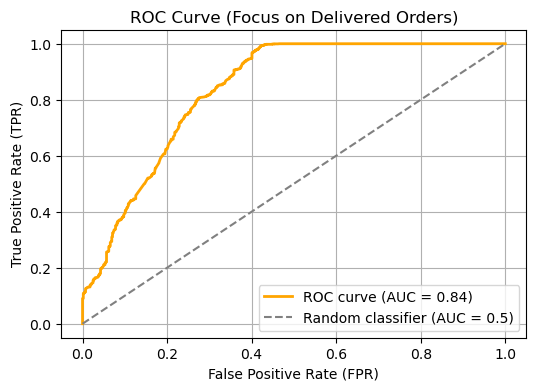

In [57]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42) 
nb = GaussianNB()
lr = LogisticRegression(max_iter=1000, random_state=42)

voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('svm', svm),
        ('nb', nb),
        ('lr', lr)
    ],
    voting='soft' )

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
voting.fit(X_train, y_train)

voting_preds = voting.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_preds))
print("\nClassification Report for Voting Classifier:\n", classification_report(y_test, voting_preds))

voting_probs = voting.predict_proba(X_test)[:, 1] 

auc_score = roc_auc_score(y_test, voting_probs)
print(f"AUC for Voting Classifier: {auc_score:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, voting_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier (AUC = 0.5)') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Focus on Delivered Orders)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 🎉✨Done!🎉✨